###                                                                Predicting Next Word Using LSTM Models

## Importing all required Libraries

In [ ]:
# Importing necessary modules
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Bidirectional,GRU

## Preparing the Data

In [ ]:
# Reading text file that will be our training data
with open('001ssb.txt','r',encoding='latin-1') as f:
  data=f.readlines()

In [ ]:
# The model will be trained on reduced dataset so taking first few thousand lines
corpus=data[:2000]
corpus1=data[5000:6000]

In [ ]:
corpus[:5]

['A Game Of Thrones \n',
 'Book One of A Song of Ice and Fire \n',
 'By George R. R. Martin \n',
 'PROLOGUE \n',
 '"We should start back," Gared urged as the woods began to grow dark around them. "The wildlings are \n']

In [ ]:
# Since during conversion \n had bee added at the end of every sentence so removing them
text_data=[sentence.replace('\n',' ') for sentence in corpus]

In [ ]:
text_data[:10]

['A Game Of Thrones  ',
 'Book One of A Song of Ice and Fire  ',
 'By George R. R. Martin  ',
 'PROLOGUE  ',
 '"We should start back," Gared urged as the woods began to grow dark around them. "The wildlings are  ',
 'dead."  ',
 '"Do the dead frighten you?" Ser Waymar Royce asked with just the hint of a smile.  ',
 'Gared did not rise to the bait. He was an old man, past fifty, and he had seen the lordlings come and go.  ',
 '"Dead is dead," he said. "We have no business with the dead."  ',
 '"Are they dead?" Royce asked softly. "What proof have we?"  ']

In [ ]:
# Joining the text, that is, turning list of sentences into only one string
# this will help us get the vocabulary of our training data
text_data = ' '.join(corpus[:2000])

> Tokenizer always ignores white spaces, so we need not to worry about `\n\n` like values in string.

In [ ]:
# Checking if we indeed got the string by reading dome characters
text_data[200:1000]

'" \n "Do the dead frighten you?" Ser Waymar Royce asked with just the hint of a smile. \n Gared did not rise to the bait. He was an old man, past fifty, and he had seen the lordlings come and go. \n "Dead is dead," he said. "We have no business with the dead." \n "Are they dead?" Royce asked softly. "What proof have we?" \n "Will saw them," Gared said. "If he says they are dead, that\'s proof enough for me." \n Will had known they would drag him into the quarrel sooner or later. He wished it had been later rather \n than sooner. "My mother told me that dead men sing no songs," he put in. \n "My wet nurse said the same thing, Will," Royce replied. "Never believe anything you hear at a woman\'s \n tit. There are things to be learned even from the dead." His voice echoed, too loud in the twilit forest. '

In [ ]:
# Tokenizing the text, that is, getting our vocabulary ready for training
tokenizer=Tokenizer()
tokenizer.fit_on_texts([text_data])

In [ ]:
# Looking at the vocabulary
tokenizer.word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'to': 4,
 'of': 5,
 'he': 6,
 'his': 7,
 'was': 8,
 'in': 9,
 'had': 10,
 'it': 11,
 'her': 12,
 'you': 13,
 'that': 14,
 'him': 15,
 'she': 16,
 'with': 17,
 'said': 18,
 'as': 19,
 'i': 20,
 'not': 21,
 'at': 22,
 'they': 23,
 'on': 24,
 'is': 25,
 'for': 26,
 'will': 27,
 'jon': 28,
 'but': 29,
 'ned': 30,
 'no': 31,
 'all': 32,
 'were': 33,
 'them': 34,
 'would': 35,
 'be': 36,
 'from': 37,
 'have': 38,
 'bran': 39,
 'been': 40,
 'when': 41,
 'there': 42,
 'man': 43,
 'could': 44,
 'eyes': 45,
 'their': 46,
 'up': 47,
 'like': 48,
 'my': 49,
 'are': 50,
 'out': 51,
 'this': 52,
 'your': 53,
 'one': 54,
 'did': 55,
 'what': 56,
 'so': 57,
 'father': 58,
 'if': 59,
 'back': 60,
 'never': 61,
 'then': 62,
 'looked': 63,
 'king': 64,
 'by': 65,
 'than': 66,
 'see': 67,
 'lord': 68,
 'catelyn': 69,
 'arya': 70,
 'brother': 71,
 'hand': 72,
 'we': 73,
 'ser': 74,
 'robb': 75,
 'me': 76,
 'page': 77,
 'down': 78,
 'robert': 79,
 'more': 80,
 'over': 81,
 'm

In [ ]:
# Checking the length of the vocab, i.e, How many unique words do we have
len(tokenizer.word_index)

3805

In [ ]:
# An example of sentence converted to sequence of tokens
sent='He is very Happy'
tokenized_sent=tokenizer.texts_to_sequences([sent])
tokenized_sent

[[6, 25, 314]]

Now we ened to convert all sentences to sequences.

And Also notice our LSTM model will be given input(all previous words of setence) and is expected output(next word of sent), so we need create multiple sequences for single sentence. To be precise for a sentence of len `n` we create `(n-1)` lists.

In [ ]:
input_seq=[]
for sent in text_data.split('\n'):

  # Since tokenizer return a sent as list of list so we take [0] index value
  tokenized_sent=tokenizer.texts_to_sequences([sent])[0]

  # Creating multilple lists for each sent
  for i in range(1,len(tokenized_sent)):
    input_seq.append(tokenized_sent[:i+1])

for i in input_seq:
  print(i)

Streaming output truncated to the last 5000 lines.
[2, 1, 213, 289, 649]
[2, 1, 213, 289, 649, 17]
[2, 1, 213, 289, 649, 17, 1]
[2, 1, 213, 289, 649, 17, 1, 571]
[2, 1, 213, 289, 649, 17, 1, 571, 5]
[2, 1, 213, 289, 649, 17, 1, 571, 5, 1]
[2, 1, 213, 289, 649, 17, 1, 571, 5, 1, 1282]
[73, 33]
[73, 33, 1023]
[73, 33, 1023, 126]
[73, 33, 1023, 126, 1]
[73, 33, 1023, 126, 1, 174]
[73, 33, 1023, 126, 1, 174, 143]
[73, 33, 1023, 126, 1, 174, 143, 18]
[73, 33, 1023, 126, 1, 174, 143, 18, 12]
[73, 33, 1023, 126, 1, 174, 143, 18, 12, 121]
[73, 33, 1023, 126, 1, 174, 143, 18, 12, 121, 446]
[73, 33, 1023, 126, 1, 174, 143, 18, 12, 121, 446, 19]
[73, 33, 1023, 126, 1, 174, 143, 18, 12, 121, 446, 19, 3]
[73, 33, 1023, 126, 1, 174, 143, 18, 12, 121, 446, 19, 3, 1761]
[70, 135]
[70, 135, 638]
[70, 135, 638, 174]
[70, 135, 638, 174, 16]
[70, 135, 638, 174, 16, 474]
[70, 135, 638, 174, 16, 474, 3485]
[70, 135, 638, 174, 16, 474, 3485, 5]
[70, 135, 638, 174, 16, 474, 3485, 5, 814]
[70, 135, 638, 174, 1

In [ ]:
# Again looking at the number of sentences in our training data
len(input_seq)

27351

Neural networks expect input of same length. Since all the sentences have different length we can find the longest sentence and expand others to its length by padding 0s.

In [ ]:
# Finding length of the longest sentence
# This will help us in many ways, for example, because only sentences with same length can be processed during training. We have
# to use max length of sequence so that every other sentence is same of length as the biggest sentence
max_len=max([len(sent) for sent in input_seq])
max_len

24

In [ ]:
# This module will pad sequences according to given max length
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_input_seq=pad_sequences(input_seq,maxlen=max_len-1,padding='pre',truncating='pre')
# Looking at the first sentence after it had been padded
padded_input_seq[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   3, 717], dtype=int32)

In [ ]:
"""
The input would be all the words of a seq before last one, so we take
last word of each seq as target and all other words as input
"""
X = padded_input_seq[:, :-1]
y = padded_input_seq[:, -1]

In [ ]:
# Looking at firts five training sequences
X[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    3],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    3,  717],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    3,  717,    5],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1331],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0, 1331,   54]],
      dtype=int32)

In [ ]:
# Looking at frist ten target variables
list(y)[0:10]

[717, 5, 1330, 54, 5, 3, 1026, 5, 286, 2]

In [ ]:
y, y.shape

(array([ 717,    5, 1330, ...,    3,  312,  109], dtype=int32), (27351,))

In [ ]:
word2idx=tokenizer.word_index
len_vocab=len(word2idx)
len_vocab

3805

In [ ]:
# Now one-hot Encoding for target varaibles so that cross entropy loss can be used to train the model to come close to the desired result.
from tensorflow.keras.utils import to_categorical
y=to_categorical(list(y),num_classes=len_vocab+1)
y[1]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

## Creating Models

### With Trainable Embedding

## Training with simple LSTM model

In [ ]:
# This is simple LSTM model with two layers
model2 = Sequential()
model2.add(Embedding(len_vocab + 1, 30, input_length=max_len - 1))
model2.add(LSTM(150,return_sequences=True))
model2.add(LSTM(150))
model2.add(Dense(len_vocab + 1, activation='softmax'))


In [ ]:
# Getting summary of the model
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 23, 30)            143700    
                                                                 
 lstm_8 (LSTM)               (None, 23, 150)           108600    
                                                                 
 lstm_9 (LSTM)               (None, 150)               180600    
                                                                 
 dense_3 (Dense)             (None, 4790)              723290    
                                                                 
Total params: 1156190 (4.41 MB)
Trainable params: 1156190 (4.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training the model using fit module in keras
model2.fit(X,y,epochs=50)

In [ ]:
# Storing the loss and acuuracy at each point in a list at each iteration
model2_loss = [6.6007, 6.2182, 6.0098, 5.8151, 5.6484, 5.5113, 5.3880, 5.2709, 5.1518, 5.0346, 4.9236, 4.8158, 4.7139, 4.6172, 4.5224, 4.4291, 4.3404, 4.2552, 4.1723, 4.0933, 4.0181, 3.9444, 3.8742, 3.8065, 3.7419, 3.6771, 3.6167, 3.5580, 3.5011, 3.4454, 3.3918, 3.3377, 3.2869, 3.2366, 3.1882, 3.1391, 3.0930, 3.0465, 3.0004, 2.9560, 2.9127, 2.8696, 2.8295, 2.7860, 2.7494, 2.7081, 2.6683, 2.6298, 2.5908, 2.5554]

model2_accuracy = [0.0631, 0.0697, 0.0781, 0.0877, 0.0976, 0.1020, 0.1074, 0.1138, 0.1180, 0.1224, 0.1278, 0.1327, 0.1376, 0.1405, 0.1439, 0.1485, 0.1533, 0.1578, 0.1647, 0.1703, 0.1784, 0.1853, 0.1928, 0.2017, 0.2105, 0.2190, 0.2284, 0.2356, 0.2446, 0.2517, 0.2614, 0.2699, 0.2776, 0.2864, 0.2929, 0.3011, 0.3094, 0.3188, 0.3253, 0.3345, 0.3422, 0.3500, 0.3558, 0.3650, 0.3718, 0.3800, 0.3881, 0.3953, 0.4016, 0.4107]

In [ ]:
# Taking the max values of accuracy list to find accuracy the last iteration
accuracy2=np.argmax(model2_accuracy,axis=0)
# Printing the accuracy
print('Accuracy of 2 Layered LSTM Model is:' +str(model2_accuracy[accuracy2])+'%')

Accuracy of 2 Layered LSTM Model is:0.4107%


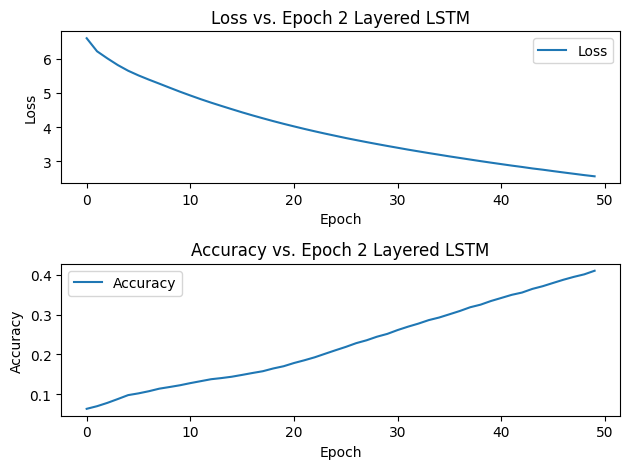

In [ ]:
# Plotting the accuracy and error of Two Layered LSTM model with respect to epoch
fig, (ax3, ax4) = plt.subplots(2, 1)

# Ploting loss on first axis
ax3.plot(model2_loss, label="Loss")
ax3.set_xlabel("Epoch")
ax3.set_ylabel("Loss")
ax3.set_title("Loss vs. Epoch 2 Layered LSTM")
ax3.legend()

# Ploting accuracy on second axis
ax4.plot(model2_accuracy, label="Accuracy")
ax4.set_xlabel("Epoch")
ax4.set_ylabel("Accuracy")
ax4.set_title("Accuracy vs. Epoch 2 Layered LSTM")
ax4.legend()

plt.tight_layout()
plt.show()

## Using GRU Model

In [ ]:
# Now using different model GRU(Gated Recurrent Unit) that is to see if we get a better result
model4=Sequential()
model4.add(Embedding(len_vocab+1,50,input_length=max_len-1))
model4.add(GRU(150))

model4.add(Dense(len_vocab+1,activation='softmax'))

In [ ]:
# Storing accuracy and loss at each epoch, this will be used to plot the loss and accuracy w.r.t epoch
GRU_loss = [6.4590, 5.7402, 5.3202, 4.9604, 4.6164, 4.2852, 3.9709, 3.6793, 3.4088, 3.1647, 2.9432, 2.7411, 2.5648, 2.4019, 2.2591, 2.1268, 2.0079, 1.9000, 1.8013, 1.7129, 1.6350, 1.5595, 1.4897, 1.4313, 1.3733, 1.3220, 1.2770, 1.2302, 1.1956, 1.1550, 1.1177, 1.0895, 1.0612, 1.0312, 1.0083, 0.9846, 0.9610, 0.9384, 0.9161, 0.8990, 0.8827, 0.8656, 0.8514, 0.8386, 0.8189, 0.8117, 0.8033, 0.7884, 0.7707, 0.7717]

GRU_accuracy = [0.0722, 0.1036, 0.1266, 0.1445, 0.1633, 0.1855, 0.2179, 0.2545, 0.2961, 0.3344, 0.3718, 0.4097, 0.4428, 0.4724, 0.5017, 0.5261, 0.5512, 0.5729, 0.5930, 0.6115, 0.6266, 0.6437, 0.6570, 0.6717, 0.6818, 0.6924, 0.7022, 0.7120, 0.7195, 0.7288, 0.7359, 0.7429, 0.7476, 0.7553, 0.7614, 0.7644, 0.7694, 0.7739, 0.7786, 0.7840, 0.7879, 0.7916, 0.7936, 0.7957, 0.8004, 0.7996, 0.8033, 0.8053, 0.8102, 0.8100]


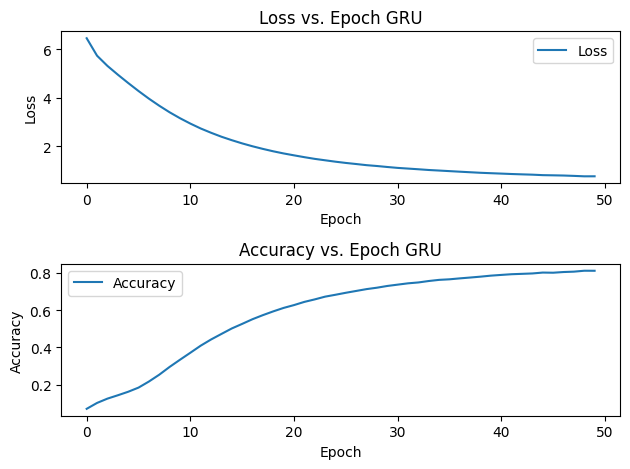

In [ ]:
import matplotlib.pyplot as plt
# Plotting the accuracy and loss of GRU model w.r.t epoch

fig, (ax1, ax2) = plt.subplots(2, 1)

# Ploting loss on first axis
ax1.plot(GRU_loss, label="Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_title("Loss vs. Epoch GRU")
ax1.legend()

# Ploting accuracy on second axis
ax2.plot(GRU_accuracy, label="Accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.set_title("Accuracy vs. Epoch GRU")
ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
# model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')
# model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')
# model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

## Using Bidirectional Model

In [ ]:
# Now yet again Using different LSTM model to see if this one perform even
# better then the first two models
model3 = Sequential()
model3.add(Embedding(len_vocab + 1, 30, input_length=max_len - 1))
model3.add(Bidirectional(LSTM(150)))
model3.add(Dense(len_vocab + 1, activation='softmax'))


In [ ]:
# Checking the summary of Bidirectional model
model3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 23, 30)            143700    
                                                                 
 bidirectional (Bidirection  (None, 300)               217200    
 al)                                                             
                                                                 
 dense_4 (Dense)             (None, 4790)              1441790   
                                                                 
Total params: 1802690 (6.88 MB)
Trainable params: 1802690 (6.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training the model
model3.fit(X,y,epochs=50)

In [ ]:
# Agian storing the error and the accuracy of the model for better undersatnding
model3_loss = [6.5555, 6.0540, 5.7126, 5.4352, 5.1645, 4.8864, 4.6071, 4.3310, 4.0554, 3.7846, 3.5281, 3.2832, 3.0557, 2.8442, 2.6490, 2.4640, 2.2957, 2.1345, 1.9891, 1.8476, 1.7201, 1.6009, 1.4867, 1.3844, 1.2865, 1.1932, 1.1078, 1.0315, 0.9571, 0.8938, 0.8307, 0.7799, 0.7260, 0.6824, 0.6393, 0.6024, 0.5650, 0.5399, 0.5090, 0.4868, 0.4634, 0.4430, 0.4300, 0.4189, 0.3927, 0.3817, 0.3756, 0.3630, 0.3501, 0.3484]

model3_accuracy = [0.0661, 0.0792, 0.0967, 0.1090, 0.1198, 0.1305, 0.1448, 0.1662, 0.1930, 0.2277, 0.2659, 0.3031, 0.3398, 0.3784, 0.4166, 0.4528, 0.4884, 0.5220, 0.5548, 0.5845, 0.6144, 0.6416, 0.6675, 0.6913, 0.7142, 0.7358, 0.7585, 0.7748, 0.7947, 0.8073, 0.8237, 0.8350, 0.8474, 0.8589, 0.8679, 0.8751, 0.8841, 0.8877, 0.8936, 0.8991, 0.9038, 0.9075, 0.9097, 0.9106, 0.9169, 0.9182, 0.9193, 0.9208, 0.9237, 0.9222]


In [ ]:
# Getting the best accucary of the model using the accuracy list
accuracy3=np.argmax(model3_accuracy,axis=0)
print('Accuracy of Bidirectional Model is:' +str(model3_accuracy[accuracy3])+'%')

Accuracy of Bidirectional Model is:0.9237%


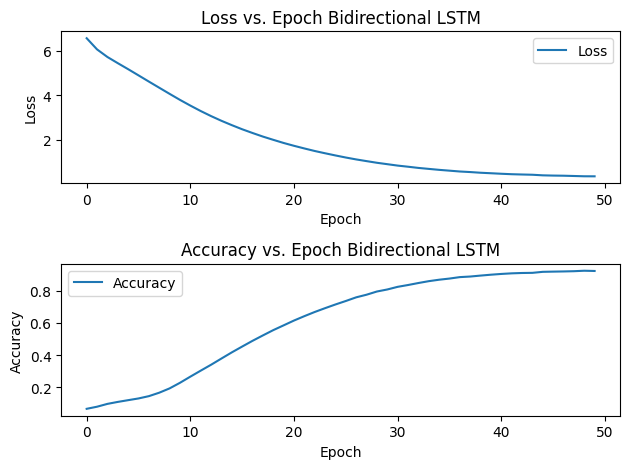

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1)
# Plotting the loss and accuracy of the Bidirectional model
# Plot loss on first axis
ax1.plot(model3_loss, label="Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_title("Loss vs. Epoch Bidirectional LSTM")
ax1.legend()

# Plot accuracy on second axis
ax2.plot(model3_accuracy, label="Accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.set_title("Accuracy vs. Epoch Bidirectional LSTM")
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
# model1.save('GOT_LSTM_Simple.keras')
# model2.save('GOT_LSTM_TwoLayers.keras')
# This code saves the model in our local machine so that we can the modle whenever we desire
model3.save('GOT_LSTM_Bidirectional1.keras')

## Using LSTM with Attention Model

In [ ]:
# Last but not the least:=>    LSTM model with attention
# This will be best model, not only because of its accuracy, but also because
# It uses attention mechanism which is very crucial in any NLP related work.
# Attention basically tells each word some information about the words that surround it.

# For Example: I went to bank for getting some money in order to buy a new car.
# And :        I sat beside my friend at the bank of the river.

# In these two sentences bank is same word, however depending on the context word(Bank) changes its meaning.
# That is what attention does, it basically tells every word(Bank) how much important
# the words(Money,River) are that surround that word(Bank) and how should it change its meaning
# depending on the context.


from keras.layers import Input, LSTM, Dense, Embedding, Attention, concatenate
from keras.models import Model



# Define the input layer
inputs = Input(shape=(max_len-2,))

# Add an Embedding layer to convert words to vectors
embedding_layer = Embedding(input_dim=len(word2idx)+1, output_dim=50)(inputs)

# Define the LSTM layer with return_sequences=True to output the full sequence
lstm_out = LSTM(units=150, return_sequences=True)(embedding_layer)

# Apply attention mechanism
attention = Attention(use_scale=True)([lstm_out, lstm_out])

# Concatenate the original LSTM output and the attention weights
attended_lstm = concatenate([lstm_out, attention], axis=-1)

# Apply another LSTM layer on the attended sequence
attended_lstm = LSTM(units=150)(attended_lstm)

# Add the output layer for your specific task
outputs = Dense(len(word2idx)+1, activation='softmax')(attended_lstm)

# Create the model
model_with_attention2 = Model(inputs, outputs)

# Compile the model with an appropriate loss function, optimizer, and metrics
model_with_attention2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
model_with_attention2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 22)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 22, 50)               190300    ['input_1[0][0]']             
                                                                                                  
 lstm (LSTM)                 (None, 22, 150)              120600    ['embedding[0][0]']           
                                                                                                  
 attention (Attention)       (None, 22, 150)              1         ['lstm[0][0]',                
                                                                     'lstm[0][0]']            

In [ ]:
# training the model
model_with_attention2.fit(X,y,batch_size=30,epochs=30)

In [ ]:
# Storing the accuracy and loss in a list
model4_loss=[1.7819, 1.7309, 1.6829, 1.6377, 1.5895, 1.5433, 1.4985, 1.4554, 1.4133, 1.3675, 1.3290, 1.2869, 1.2467, 1.2074, 1.1701, 1.1328, 1.0967, 1.0624, 1.0288, 0.9913, 0.9565, 0.9267, 0.8974, 0.8633, 0.8385, 0.8066, 0.7797, 0.7551, 0.7259, 0.7001, 0.6745, 0.6532, 0.6318, 0.6086, 0.5842, 0.5667, 0.5452, 0.5248, 0.5139, 0.4936, 0.4755, 0.4635, 0.4417, 0.4301, 0.4189, 0.4062, 0.3905, 0.3801, 0.3739, 0.3578]
model4_accuracy=[0.5781, 0.5905, 0.6011, 0.6134, 0.6251, 0.6361, 0.6499, 0.6587, 0.6723, 0.6796, 0.6917, 0.7028, 0.7135, 0.7221, 0.7324, 0.7403, 0.7524, 0.7592, 0.7698, 0.7811, 0.7893, 0.7968, 0.8034, 0.8122, 0.8201, 0.8288, 0.8355, 0.8397, 0.8493, 0.8555, 0.8619, 0.8674, 0.8721, 0.8791, 0.8838, 0.8870, 0.8927, 0.8966, 0.9000, 0.9037, 0.9074, 0.9090, 0.9143, 0.9164, 0.9192, 0.9214, 0.9237, 0.9257, 0.9261, 0.9292]

In [ ]:
# Prining the models max accuracy
accuracy4=np.argmax(model4_accuracy)
print('Accuracy of LSTM when we use Attention Layer too: '+ str(model4_accuracy[accuracy4])+'%')

Accuracy of LSTM when we use Attention Layer too: 0.9292%


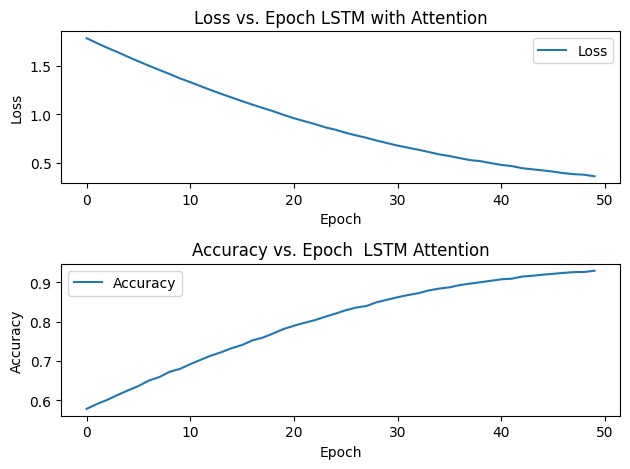

In [ ]:
# Plotting the accuracy and the loss of the Attention model
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1)

# Plot loss on first axis
ax1.plot(model4_loss, label="Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_title("Loss vs. Epoch LSTM with Attention")
ax1.legend()

# Plot accuracy on second axis
ax2.plot(model4_accuracy, label="Accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.set_title("Accuracy vs. Epoch  LSTM Attention" )
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Saving the model for future use
model_with_attention2.save('LSTM_with_Attention.keras')

In [ ]:
# This is the function which allows us to use the saved models and do with them as we please
model=load_model('/content/LSTM_with_Attention.keras')

### It's Time to Test our Trained Models

In [ ]:
import numpy as np

In [ ]:
# Importing time so that we can see how much time each step takes
# As we can see that our model predicts one word at a time
# So we will give it the word, that has been predicted and also the previous words
# So that it has better context of the conversation
import time
text = "arya"

for i in range(30):
  # First we have to tokenize our input text, i.e, convrting text into numbers
  token_text = tokenizer.texts_to_sequences([text])[0]
  # Remember we had used the padding which meant that every sequence has to be of same length
  # This is essentially that, because our models were trained at some specific sequence length
  # at the time of inference we have to give it a sequence of same length. If we give it some other length it will give an
  # error
  padded_token_text = pad_sequences([token_text], maxlen=max_len-1, padding='pre')
  # predicting the next word. Remember that last layer is a Dense layer, which will give us
  # a vector with length of our vocabulary as its dimentions, which will be in logits(Probabilities)
  # Now we have to take a word out of those logits that has maximum probability and use that word as our predicted next word.
  # For the argmax is used which gives us the position of a word with maximum probability
  pos = np.argmax(model2.predict(padded_token_text))
  # Now we look for the word associated with that position and attach it with the output text that we have generated
  for word,index in tokenizer.word_index.items():
    if index == pos:
      text = text + " " + word
      print(text)
      # time.sleep(1)


1/1 [==============================] - 0s 323ms/step
arya glanced
1/1 [==============================] - 0s 17ms/step
arya glanced behind
1/1 [==============================] - 0s 21ms/step
arya glanced behind her
1/1 [==============================] - 0s 19ms/step
arya glanced behind her saw
1/1 [==============================] - 0s 18ms/step
arya glanced behind her saw khal
1/1 [==============================] - 0s 18ms/step
arya glanced behind her saw khal mordane
1/1 [==============================] - 0s 20ms/step
arya glanced behind her saw khal mordane had
1/1 [==============================] - 0s 18ms/step
arya glanced behind her saw khal mordane had said
1/1 [==============================] - 0s 19ms/step
arya glanced behind her saw khal mordane had said that
1/1 [==============================] - 0s 19ms/step
arya glanced behind her saw khal mordane had said that was
1/1 [==============================] - 0s 20ms/step
arya glanced behind her saw khal mordane had said that was 